In [21]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt

In [22]:
df = pd.read_csv("Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [23]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


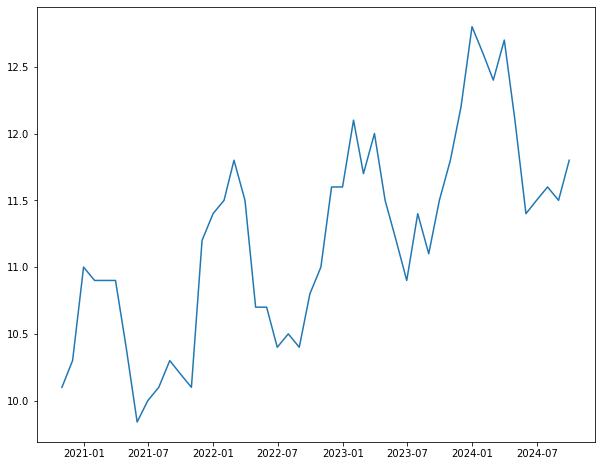

In [24]:
plt.figure(figsize = (10,8))
plt.plot(df['Dates'],df['Prices'])

In [25]:
#Injection Dates
#As the client has asked for injection before winter therefore chose these below dates:
df.set_index("Dates", inplace = True)
injection_dates = ['2021-06-30','2021-07-31','2021-08-31']
injection_prices = df.loc[injection_dates]['Prices']
injection_prices

Dates
2021-06-30    10.0
2021-07-31    10.1
2021-08-31    10.3
Name: Prices, dtype: float64

In [26]:
#Withdrawal Dates (During winter)
withdrawal_dates = ['2021-12-31','2022-01-31','2022-02-28']
withdrawal_prices = df.loc[withdrawal_dates]['Prices']
withdrawal_prices

Dates
2021-12-31    11.4
2022-01-31    11.5
2022-02-28    11.8
Name: Prices, dtype: float64

In [52]:
#Basic Input costs-
injection_cost = 10000
withdrawal_cost = 10000
transportation_costs = 50000
max_storage = 2000000
max_injection_rate = 450000 #monthly
max_withdrawal_rate = 450000 #monthly
storage_cost = 100000

In [53]:
#Planned Injection
inject_plan = 0
for i in range(0, len(injection_prices)):
    inject_plan = inject_plan + injection_prices[i]*max_injection_rate

inject_plan

13680000.0

In [54]:
#Planned Withdrawal
withd_plan = 0

for i in range(0,len(withdrawal_prices)):
     withd_plan = withd_plan + withdrawal_prices[i]*max_withdrawal_rate

withd_plan    

15615000.0

In [55]:
#Margin
margin = withd_plan - inject_plan
margin

1935000.0

In [56]:
#Storage Time(Monthly)
#Calculated using the 1st injection date and last withdrawal date
storage_time = len(pd.date_range(start=injection_dates[0], end=withdrawal_dates[-1], freq='M'))
storage_time

9

In [57]:
total_storage_cost = storage_time*storage_cost
total_storage_cost

900000

In [58]:
# Value of the contract
net_margin = (margin - transportation_costs*(len(withdrawal_dates)+len(injection_dates)) - total_storage_cost - 
                    injection_cost*len(injection_dates) - 
                     withdrawal_cost*len(withdrawal_dates) )


net_margin

675000.0

In [66]:
#Pricing Model
def price_model(injection_dates, withdrawal_dates, injection_prices, withdrawal_prices, 
                max_injection_rate, max_withdrawal_rate, max_storage = None, storage_cost=150000):
    injection_cost = 10000
    withdrawal_cost = 10000
    transportation_cost = 50000
    injection_plan = 0
    withdrawal_plan = 0
    for i in range(0, len(injection_prices)):
        injection_plan = injection_plan + injection_prices[i]*max_injection_rate
    for i in range(0,len(withdrawal_prices)):
        withdrawal_plan = withdrawal_plan + withdrawal_prices[i]*max_withdrawal_rate
    margin = withdrawal_plan - injection_plan
    storage_time = len(pd.date_range(start=injection_dates[0], end=withdrawal_dates[-1], freq='M'))
    total_storage_cost = storage_time*storage_cost
    #Contract Value
    net_margin = (margin - injection_cost*len(injection_dates) - transportation_costs*(len(withdrawal_dates)+
                        len(injection_dates)) - withdrawal_cost*len(withdrawal_dates) - total_storage_cost)
    return net_margin

In [67]:
price_model(injection_dates, withdrawal_dates, injection_prices, withdrawal_prices, max_injection_rate, max_withdrawal_rate)

225000.0